In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## DataFrame Description:

The Dataset contains The World Happiness Report. This report is a landmark survey of the state of global happiness. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.
The Happiness score reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The columns GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describes the extent to which these factors like economic production, social support, life expectancy, freedom, absence of corruption, and generosity respectively contribute in evaluating the happiness in each country.

Dystopia is an imaginary country that has the world’s least-happy people. This country that has values equal to the world’s lowest national averages for each of the six factors(lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support). 

On the basis of this dataset, we have to predict the happiness score considering all the other factors mentioned in the dataset.

In [4]:
df.shape

(158, 12)

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here, the data types of "Country" & "Region" are Object and there's "Happiness Rank" column whose data type is int64. Rest of the columns has float64 dtype.

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observation:- 
    1.The Standard Error, Trust(Government Corruption), Generosity, Dystopia Residul- these columns has higher mean than median(50th percentile).
    2.Happiness Rank has large gap between 75th percentile and max value. Hence, it has some outliers.

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

observation:- There's no null values present in any of the columns.

In [8]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [9]:
df['Happiness Score'].value_counts()

5.192    2
5.548    1
4.867    1
4.800    1
3.896    1
        ..
5.759    1
4.677    1
6.901    1
6.003    1
6.611    1
Name: Happiness Score, Length: 157, dtype: int64

## EDA 

Univariate Analysis

<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

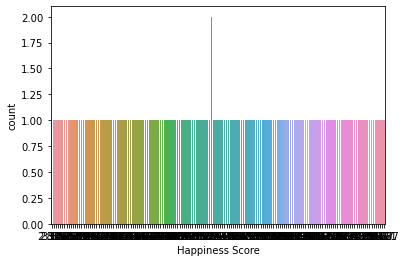

In [10]:
sns.countplot(df['Happiness Score'])

The above chart shows that there are equal number of obsevations per category has found on the target column ie Happiness Score.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

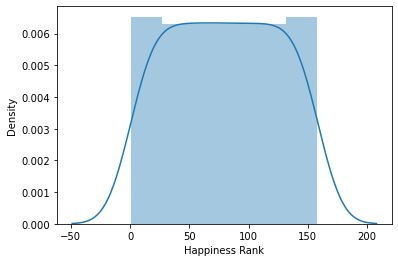

In [11]:
sns.distplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

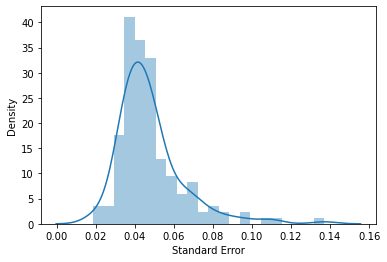

In [12]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

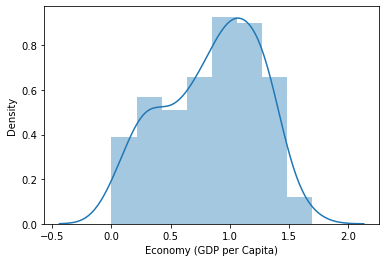

In [13]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

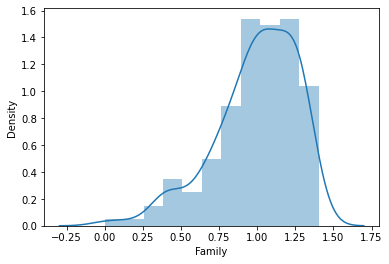

In [14]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

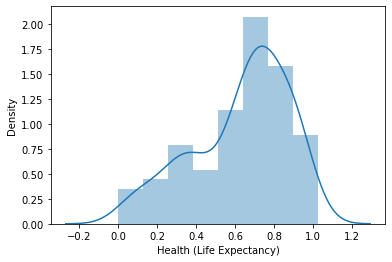

In [15]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

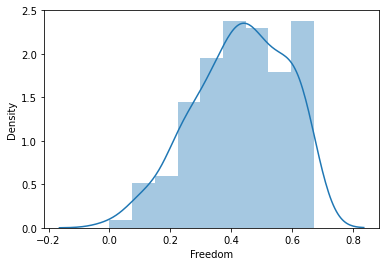

In [16]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

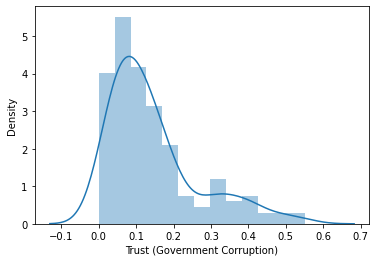

In [17]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

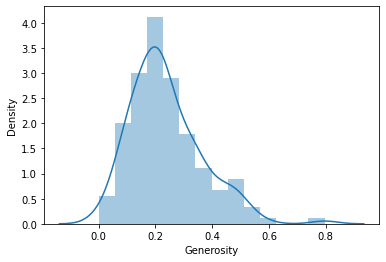

In [18]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

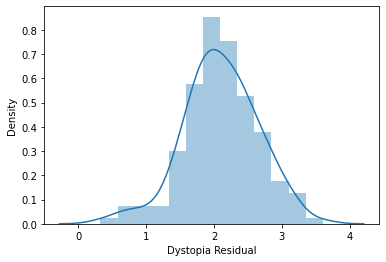

In [19]:
sns.distplot(df['Dystopia Residual'])

observation:- Standard Error, Health(Life Expectancy), Trust(Government corruption) - these columns shows their data is not normally distributed.

<AxesSubplot:xlabel='Happiness Rank'>

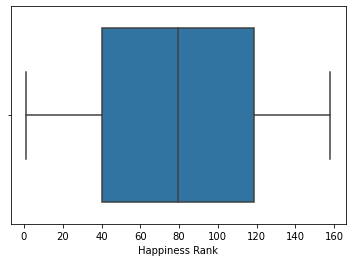

In [21]:
sns.boxplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Standard Error'>

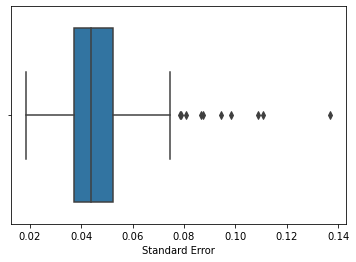

In [22]:
sns.boxplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

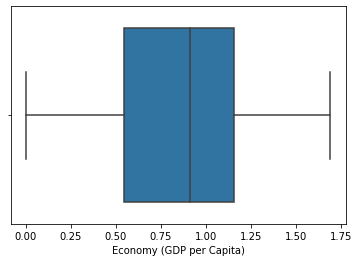

In [23]:
sns.boxplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family'>

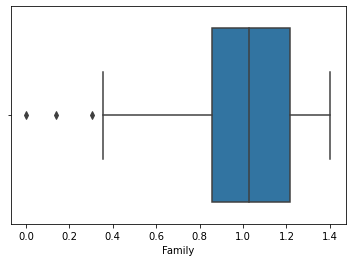

In [24]:
sns.boxplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

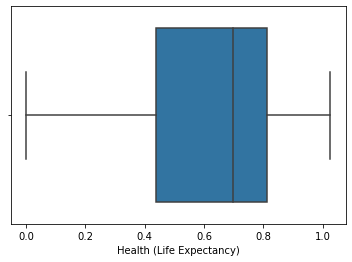

In [25]:
sns.boxplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom'>

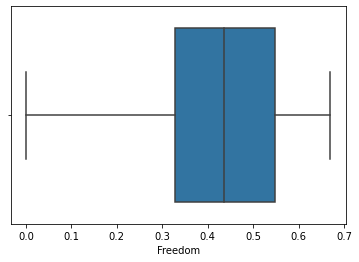

In [26]:
sns.boxplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

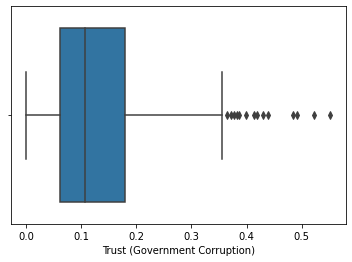

In [27]:
sns.boxplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity'>

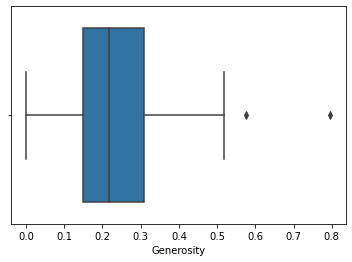

In [28]:
sns.boxplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual'>

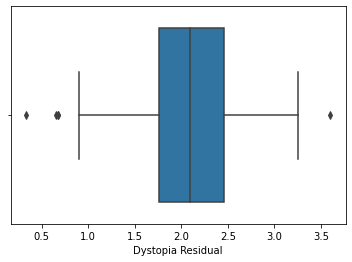

In [29]:
sns.boxplot(df['Dystopia Residual'])

Observation:- these boxplot shows the following columns has outliers 1.Standard error
2.Family
3.Trust (Government Corruption)
4.Generosity
5.Dystopia Residual.

Bivariate Analysis

<AxesSubplot:title={'center':'Comparison Between Standard Error and Trust (Government Corruption)'}, xlabel='Standard Error', ylabel='Trust (Government Corruption)'>

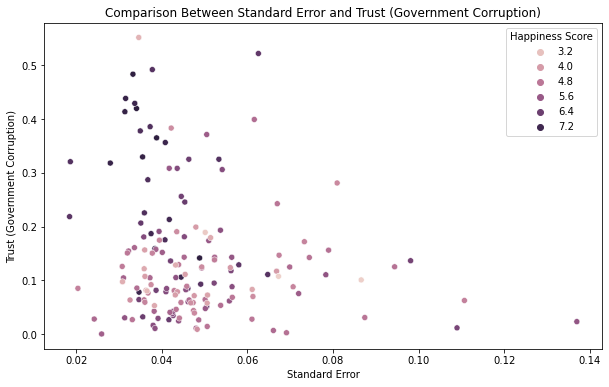

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparison Between Standard Error and Trust (Government Corruption)')
sns.scatterplot(df['Standard Error'],df['Trust (Government Corruption)'],hue=df['Happiness Score'])

From the above observation we can see the difference betweent the Trust(Government Curroption) and Standard Error.

<AxesSubplot:title={'center':'Comparison Between Standard Error and Dystopia Residual'}, xlabel='Standard Error', ylabel='Trust (Government Corruption)'>

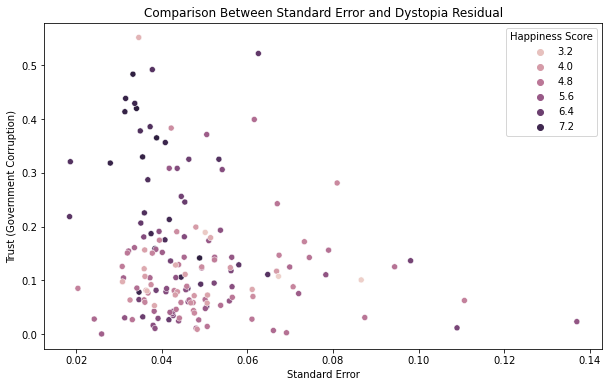

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparison Between Standard Error and Dystopia Residual')
sns.scatterplot(df['Standard Error'],df['Trust (Government Corruption)'],hue=df['Happiness Score'])

From the above table we can see the relationship between the Standard Error and the Dystopia Residual

<AxesSubplot:title={'center':'Comparison Between Family and Dystopia Residual'}, xlabel='Family', ylabel='Dystopia Residual'>

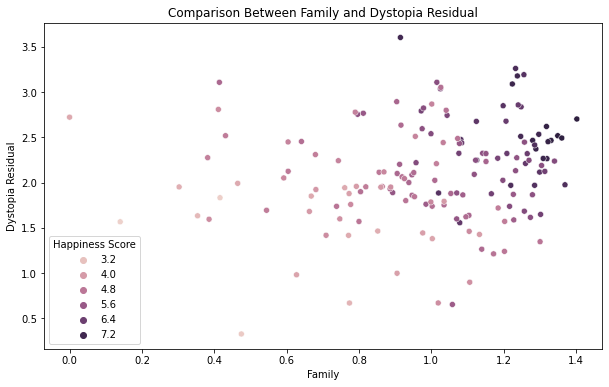

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison Between Family and Dystopia Residual')
sns.scatterplot(df['Family'],df['Dystopia Residual'],hue=df['Happiness Score'])

The above observation gives the comparison between Family and Dystopia and shows the more values of Dystopia Residual and Family belong in the darker dots of the chart.

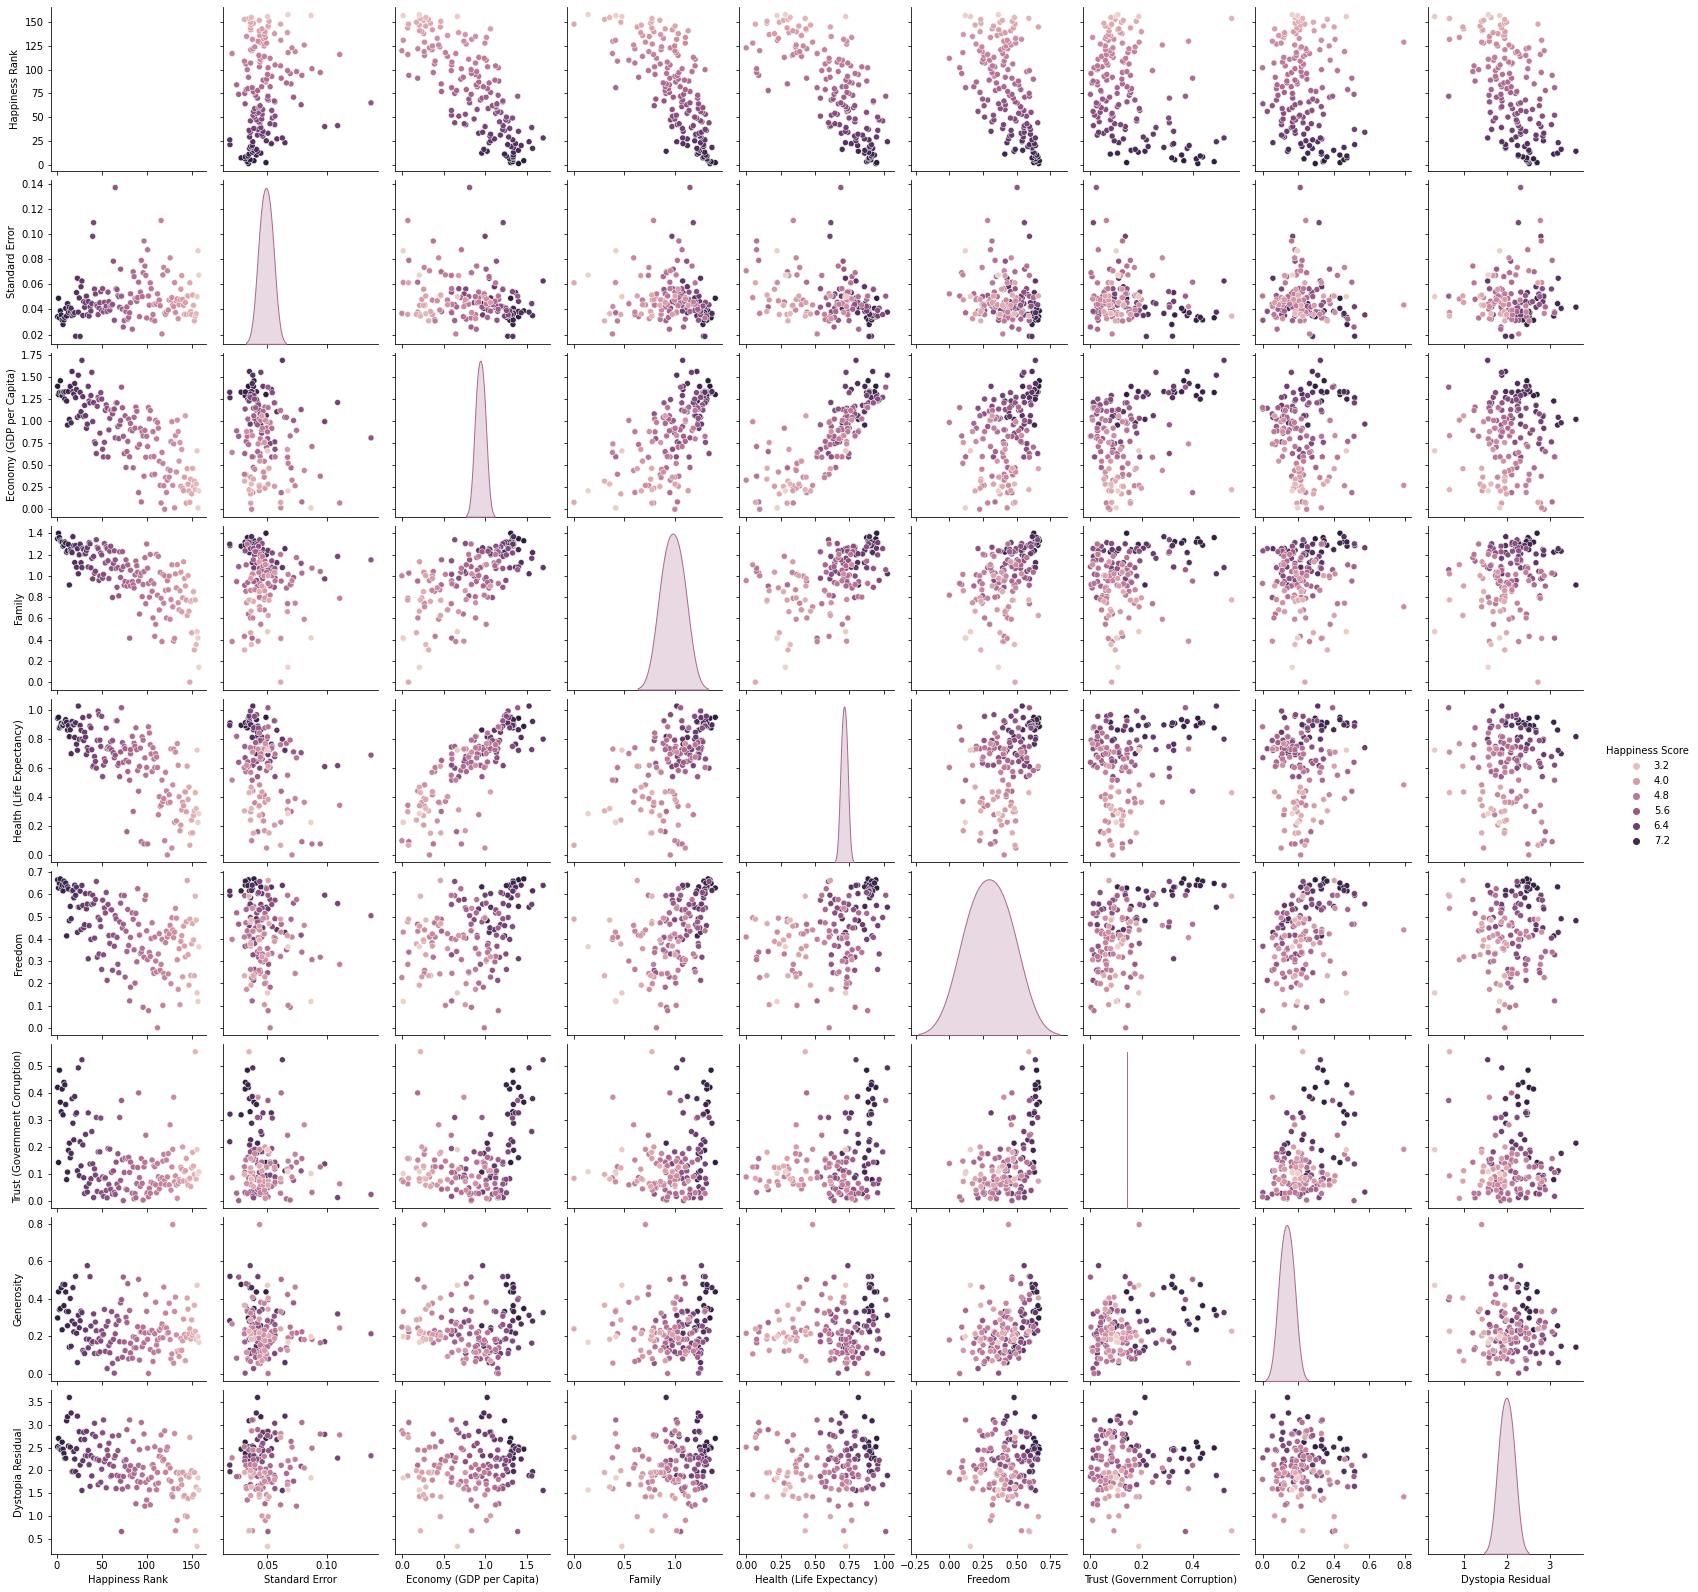

In [34]:
sns.pairplot(df,hue="Happiness Score")

In [35]:
cor=df.corr()
cor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

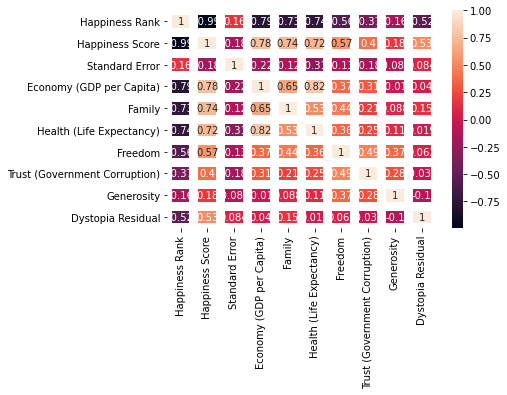

In [36]:
sns.heatmap(cor,annot=True,linewidths=8,color='b')

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [38]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.9 KB


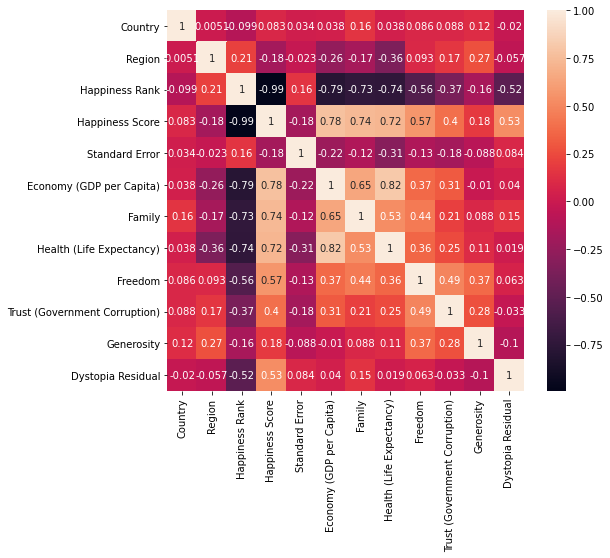

In [40]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Using heatmap, checking the columns which are positively and negatively correlated with the target columns.

## Missing Value Treatment

In [41]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

observation:- There are no missing values in the dataset

## Outlier Removal

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [43]:
new_df=df[(z<3).all(axis=1)]

Using zscore, the outliers are removed from the dataframe. created new dataframe with no null values present in it.

In [44]:
new_df.shape

(149, 12)

In [45]:
df.shape

(158, 12)

In [46]:
# Data Loss

Data_loss = ((158-149)/158)*100
Data_loss

5.69620253164557

The loss of data after removing the oulier is 5.696%.

## Skewness

In [47]:
new_df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

The columns - 1)Standard Error  2)Family  3)Health(Life Expectancy)  4)Trust(Government Corruption)  5)Generosity has the skewness out of the range of +/-0.5

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

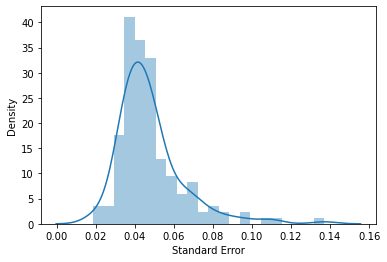

In [49]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

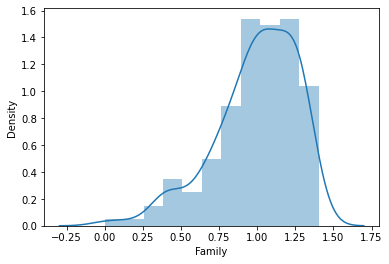

In [50]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

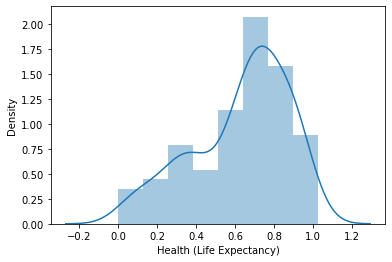

In [51]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

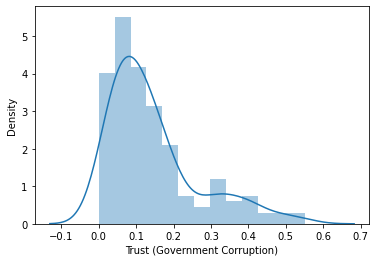

In [52]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:ylabel='Frequency'>

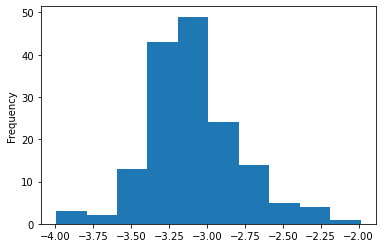

In [53]:
from scipy.stats import boxcox
df['Standard Error']=boxcox(df['Standard Error'],0)
df['Standard Error'].plot.hist()

#### Seperating the columns into Features(x) and Target(y).

In [61]:
x=new_df.drop("Happiness Score",axis=1)
y=new_df["Happiness Score"]

In [62]:
x.shape

(149, 11)

In [63]:
y.shape

(149,)

## Scalling 

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.9999999514919153  on Random_state 8


getting the Best random state 8

Train_test_split the data

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)

In [81]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [71]:
#already imported LinearRegression()

lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9999999514919153


In [82]:
ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9812252127727682


In [83]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)

0.9908360707145503


From above, the Models give different r2_scores as follows:
    1. Linear Regression = 0.9999999514919153
    2. Lasso = 0.9812252127727682
    3. Random Forest Regressor = 0.9908360707145503

## Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5).mean())

0.9999981468771427


In [84]:
print(cross_val_score(ls,x,y,cv=5).mean())

0.4102008530886573


In [85]:
print(cross_val_score(RFR,x,y,cv=5).mean())

-1.7878493401398448


From above we get mean cross validation scores for each model

## cheking for overfitting and underfitting

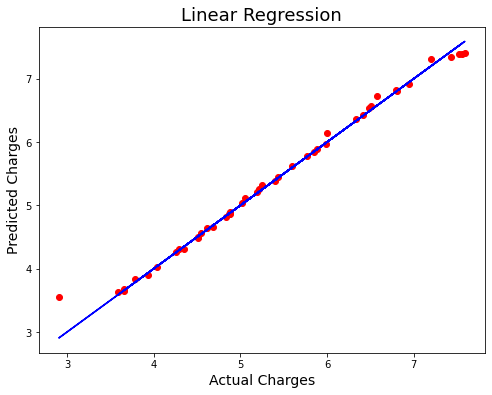

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line is covering most of the datapoints which represents good fit for our model.

## Hyper Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter={'alpha':[.0001,.001,.01,.1,1,10],
          'random_state':list(range(0,10)),
           'selection':['cyclic','random'],
           'max_iter':[50]}

In [95]:
GCV = GridSearchCV(Lasso(),parameter,cv=5)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [50],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'selection': ['cyclic', 'random']})

In [97]:
GCV.best_params_

{'alpha': 0.0001, 'max_iter': 50, 'random_state': 7, 'selection': 'random'}

In [100]:
Happiness_score_final=Lasso(alpha=0.0001, max_iter= 50, random_state= 7, selection= 'random')
Happiness_score_final.fit(x_train,y_train)
pred=Happiness_score_final.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

99.99941995401278


### We are getting the model accuracy and cross validation score both as 99.99% which shows our model is performing extremely well

## Saving the model

In [101]:
import joblib
joblib.dump(Happiness_score_final,"Happiness_Score_model(submission).pkl")

['Happiness_Score_model(submission).pkl']

In [109]:
Happiness_model = joblib.load(open('Happiness_Score_model(submission).pkl','rb'))
result = Happiness_model.score(x_test,y_test)
print(result)

0.9999941995401278


In [107]:
Conclusion = pd.DataFrame([Happiness_model.predict(x_test)[:],ls.predict(x_test)[:]],index=["Predicted","Original"])

Concluding and comparing the Predicted data and Original data based on our model performance

In [108]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,7.422095,6.505390,6.575923,5.589488,4.884536,6.330944,6.796740,3.656069,4.034872,5.215013,...,5.255328,4.685495,5.057655,6.413145,4.868864,4.505061,6.005186,5.198093,5.771569,4.608474
Original,7.162815,6.542293,6.590025,5.635375,4.943254,6.422961,6.709356,3.678344,4.012471,5.372847,...,5.396713,4.656860,5.110318,6.446828,4.871656,4.346598,6.232032,5.348981,5.826305,4.537528
